In [28]:
import gym
from gym import wrappers
import numpy as np
import random
import os
import matplotlib.pyplot as plt

In [45]:
env = gym.make('FrozenLake8x8-v0')
# env = wrappers.Monitor(env, os.getcwd()+'\\tmp\\FrozenLake_ex1')
n_states = env.observation_space.n
n_actions = env.action_space.n

# Value function vector
V = np.zeros([n_states, 1])
# theta
theta = np.random.rand(n_states*n_actions,1)

num_episodes = 4000
consecutive = 200
gamma = 0.99
V_table = np.zeros([num_episodes,n_states])
lr_critic = 0.2 # 0.4
lr_actor = 0.6 # 0.6

In [46]:
list_reward = []
for episode in range(num_episodes):
    # print("Episode", episode)
    # First observation
    s = env.reset()
    done = False
    discount = 1
    total_reward = 0
    num_steps = 0
    while not done:
        num_steps += 1
        # Compute softmax
        phi = np.zeros([4, n_states*n_actions])
        for a in range(n_actions):
            phi[a, s*n_actions + a] = 1
        product = phi.dot(theta)
        exponentiated = np.power(np.e, product)
        total = np.sum(exponentiated)
        prob_actions = np.divide(exponentiated, total)
        action = np.random.choice(np.arange(0,4), 1, p=list(np.ndarray.flatten(prob_actions)))
        action_table[n_actions]
        # take action
        obs, reward, done, info = env.step(action[0])
#        if reward == 1:
#            print("Reward 1!!!!!!!!!!!! At state", obs)
        # td error
        delta = reward + gamma*V[obs] - V[s]

        # update value vector
        # V[s] = V[s] + (1/num_steps)*delta
        V[s] = V[s] + lr_critic*delta        
        V_table[episode,s] = V[s] 
        # theta update
        gradient = np.transpose(phi[action,:])
        for a in range(n_actions):
            gradient = gradient + prob_actions[a] * np.transpose(phi[a:a+1,:])
            theta = theta +  (0.01/(num_steps*np.log(num_steps+1)))* discount * delta * gradient
#         theta = theta +  lr_actor* discount * delta * gradient        

        discount = discount * gamma
        s = obs
        total_reward += reward
        
    list_reward.append(total_reward)

    if (episode % consecutive == 0):
#         print('Epidode no.=', episode)
#         print("Theta\n", theta)
#         print('V\n', V)
#         print("Score over time: " + str(sum(list_reward)/consecutive))        
        list_reward = []

In [47]:
np.shape(V_table)

(4000, 64)

In [48]:
means = [row.mean() for row in V_table]
squared_errors = [(row-mean)**2 for row, mean in zip(V_table, means)]
variances = [row.mean() for row in squared_errors]

In [49]:
np.size(variances)

4000

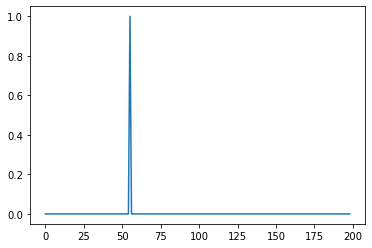

In [54]:
plt.plot(list_reward)